In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt



df = pd.read_csv("/home/zemfira/Фаза 0/Data-analysis-of-the-service-for-the-sale-and-rental-of-residential-real-estate/_data.csv")
df.head(5)
pd.set_option('display.max_columns', None)
print(df)

       Unnamed: 0  ID  объявления Количество комнат       Тип  \
0               0       271271157                 4  Квартира   
1               1       271634126                 4  Квартира   
2               2       271173086   4, Оба варианта  Квартира   
3               3       272197456   4, Оба варианта  Квартира   
4               4       273614615                 2  Квартира   
...           ...             ...               ...       ...   
23363       23363       215565511               NaN  Квартира   
23364       23364       274654844                 1  Квартира   
23365       23365       268679909   2, Оба варианта  Квартира   
23366       23366       274807525                 2  Квартира   
23367       23367       274672243   2, Оба варианта  Квартира   

                              Метро  \
0      м. Смоленская (9 мин пешком)   
1      м. Смоленская (8 мин пешком)   
2      м. Смоленская (7 мин пешком)   
3      м. Смоленская (3 мин пешком)   
4       м. Арбатская (7 

# Исследование проводится по Москве, поэтому выделяем только этот город в столбце **Адрес**

In [2]:
df_new = df[df['Адрес'].str.contains("Москва")] #исключаем все адреса, находящиеся не в Москве
print(df_new)

       Unnamed: 0  ID  объявления Количество комнат       Тип  \
0               0       271271157                 4  Квартира   
1               1       271634126                 4  Квартира   
2               2       271173086   4, Оба варианта  Квартира   
3               3       272197456   4, Оба варианта  Квартира   
4               4       273614615                 2  Квартира   
...           ...             ...               ...       ...   
23363       23363       215565511               NaN  Квартира   
23364       23364       274654844                 1  Квартира   
23365       23365       268679909   2, Оба варианта  Квартира   
23366       23366       274807525                 2  Квартира   
23367       23367       274672243   2, Оба варианта  Квартира   

                              Метро  \
0      м. Смоленская (9 мин пешком)   
1      м. Смоленская (8 мин пешком)   
2      м. Смоленская (7 мин пешком)   
3      м. Смоленская (3 мин пешком)   
4       м. Арбатская (7 

## Добавляем новые колонки для дальнейшего изучения

In [3]:
df_new['Общая площадь'] = df_new["Площадь, м2"].str.split('/').str[0]
df_new['Общая площадь'] = pd.to_numeric(df_new['Общая площадь'])
df_new['Цена в месяц'] = df_new["Цена"].str.split('/').str[0]
df_new['Цена в месяц'] = df_new['Цена в месяц'].map(lambda x: x[0:-5])
df_new['Цена в месяц'] = pd.to_numeric(df_new['Цена в месяц'])


/tmp/ipykernel_41371/1701229544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Общая площадь'] = df_new["Площадь, м2"].str.split('/').str[0]
/tmp/ipykernel_41371/1701229544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Общая площадь'] = pd.to_numeric(df_new['Общая площадь'])
/tmp/ipykernel_41371/1701229544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

##  Строим скаттерплот, чтобы посмотреть зависимость **Цены квартиры в месяц** от **Общей площади квартиры**

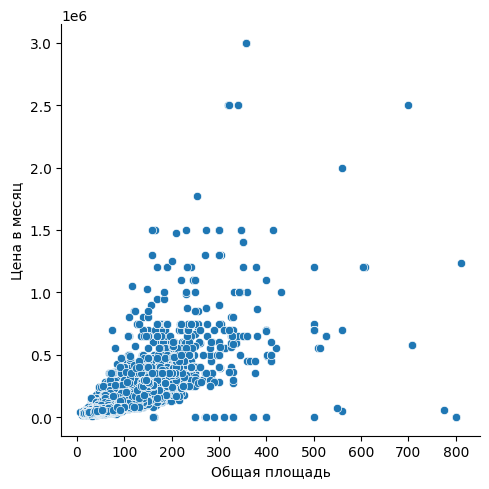

In [4]:
sns.relplot(data = df_new, x = 'Общая площадь', y = 'Цена в месяц', kind = 'scatter');  # в дальнейшем удалить выбросы

#### Вывод: в дальнейшем исследовании необходимо будет удалить выбросы

## Построим тепловую карту для **Цены квартиры в месяц** и **Общей площади квартиры**

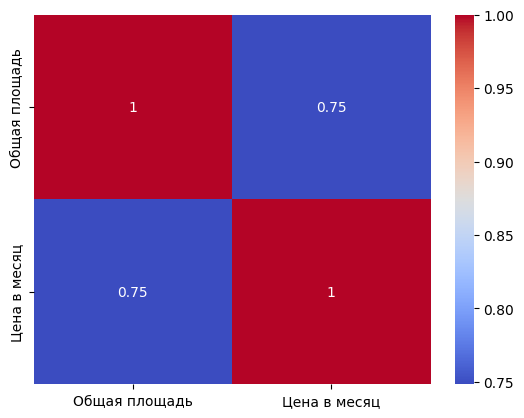

In [176]:
df_corr = df_new[['Общая площадь', 'Цена в месяц']]
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm');

#### Вывод: коэффициент корреялции межжду двумя признаками равен 0,75, что говорит о прямой и средней корреляции показателей

## Построим барплот по 10-топ самых дорогих квартир

<Figure size 5000x5000 with 0 Axes>

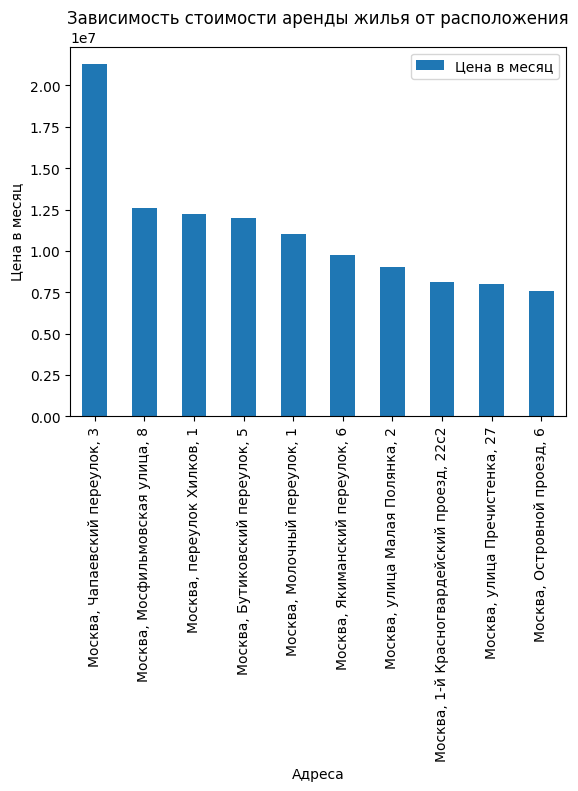

In [191]:
fig = plt.figure(figsize=(50,50))
top_10 = df_new[['Адрес', 'Цена в месяц']].groupby('Адрес').sum().sort_values(['Цена в месяц'], ascending = False)
top_10 = top_10.iloc[0:10, :]
top_10.plot.bar()
plt.ylabel('Цена в месяц')
plt.xlabel('Адреса')
plt.title("Зависимость стоимости аренды жилья от расположения");

## Построим барплот по 10-топ самых дешевых квартир

<Figure size 5000x1000 with 0 Axes>

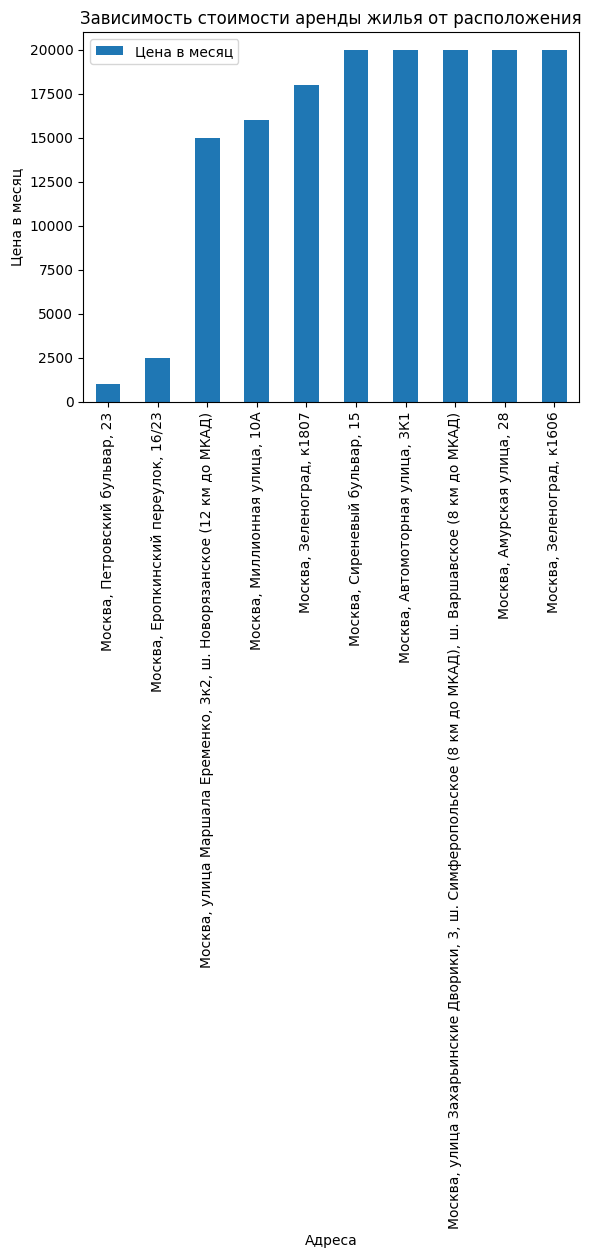

In [192]:
top_10 = df_new[['Адрес', 'Цена в месяц']].groupby('Адрес').sum().sort_values(['Цена в месяц'], ascending =  True)
top_10 = top_10.iloc[0:10, :]
fig = plt.figure(figsize=(50,10))
top_10.plot.bar()
plt.ylabel('Цена в месяц')
plt.xlabel('Адреса')
plt.title("Зависимость стоимости аренды жилья от расположения");

## Средняя цена аренды квартиры в месяц

In [194]:
mean_price = round(df_new['Цена в месяц'].mean(), 2)
print(f'Средняя цена аренды квартиры в месяц - {mean_price}')

Средняя цена аренды квартиры в месяц - 86551.52


## Мода цены квартиры за месяц

In [197]:
moda_price = round(df_new['Цена в месяц'].mode(), 2)
print(moda_price)

0    40000.0
Name: Цена в месяц, dtype: float64


## Медиана цены квартры за месяц

In [198]:
median_price = round(df_new['Цена в месяц'].median(), 2)
print(f'Медиана цены квартиры за месяц - {median_price}')

Медиана цены квартиры за месяц - 50000.0


## Далее посмотрели зависимость от вида парковки и средней цены аренды

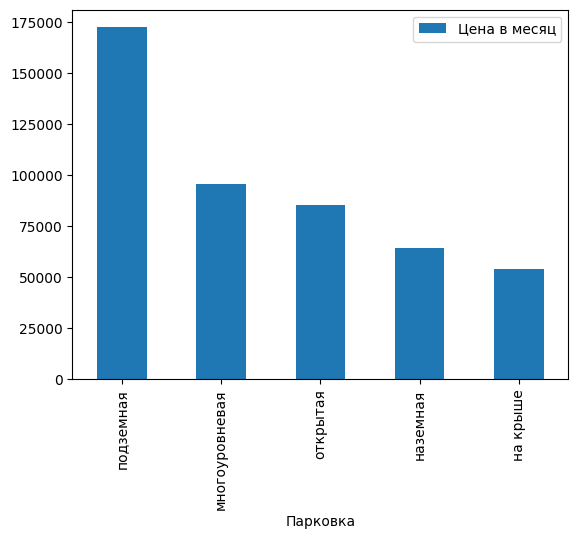

In [69]:
df_cleaned = df_new.dropna(subset=['Парковка'])
df_cleaned = df_cleaned[['Парковка', 'Цена в месяц']]
df_cleaned.groupby('Парковка').mean().sort_values(['Цена в месяц'], ascending = False)
parking = df_cleaned.groupby('Парковка').mean().sort_values(['Цена в месяц'], ascending = False)
parking.plot.bar()
plt.ylabel('Виды паровки')
plt.xlabel('Средняя стоимость аренды')
plt.title("Зависимость стоимости аренды жилья от вида парковки");

## На столбатой диаграмме показана зависисмость средней цены квартиры за месяц от высоты потолков

<Figure size 5000x1000 with 0 Axes>

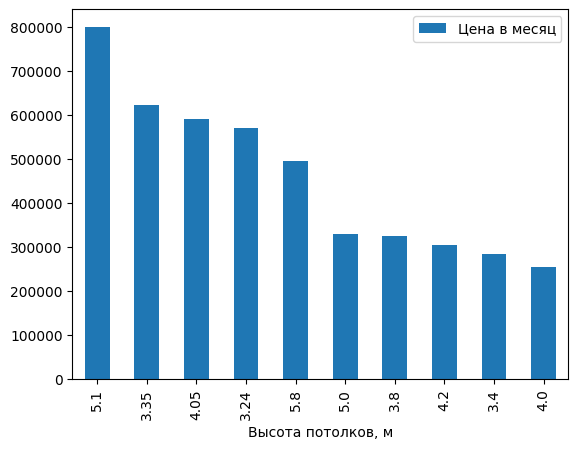

In [182]:
df_cleaned = df_new.dropna(subset=['Высота потолков, м'])
df_cleaned = df_cleaned[['Высота потолков, м', 'Цена в месяц']]
df_cleaned.groupby('Высота потолков, м').mean().sort_values(['Цена в месяц'], ascending = False)
parking = df_cleaned.groupby('Высота потолков, м').mean().sort_values(['Цена в месяц'], ascending = False)
top_10 = parking.iloc[0:10, :]
fig = plt.figure(figsize=(50,10))
top_10.plot.bar()
plt.ylabel('Высота потолков')
plt.xlabel('Средняя стоимость аренды')
plt.title("Зависимость стоимости аренды жилья от высоты потолков");

## Зависимость цены квартиры за месяц от количества комнат

In [199]:
df_new['Количество комнат'] = df_new['Количество комнат'].str.extract('(\d+)').astype(float)
mean_numb = df_new['Количество комнат'].mean()
df_new['Количество комнат'] = df_new['Количество комнат'].fillna(mean_numb)
df_new['Количество комнат'] = df_new['Количество комнат'].astype(int)
df_cleaned = df_new.dropna(subset=['Количество комнат'])
df_cleaned = df_cleaned[['Количество комнат', 'Цена в месяц']]

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_28973/3568349983.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_new['Количество комнат'] = df_new['Количество комнат'].str.extract('(\d+)').astype(float)
/tmp/ipykernel_28973/3568349983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Количество комнат'] = df_new['Количество комнат'].str.extract('(\d+)').astype(float)
/tmp/ipykernel_28973/3568349983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

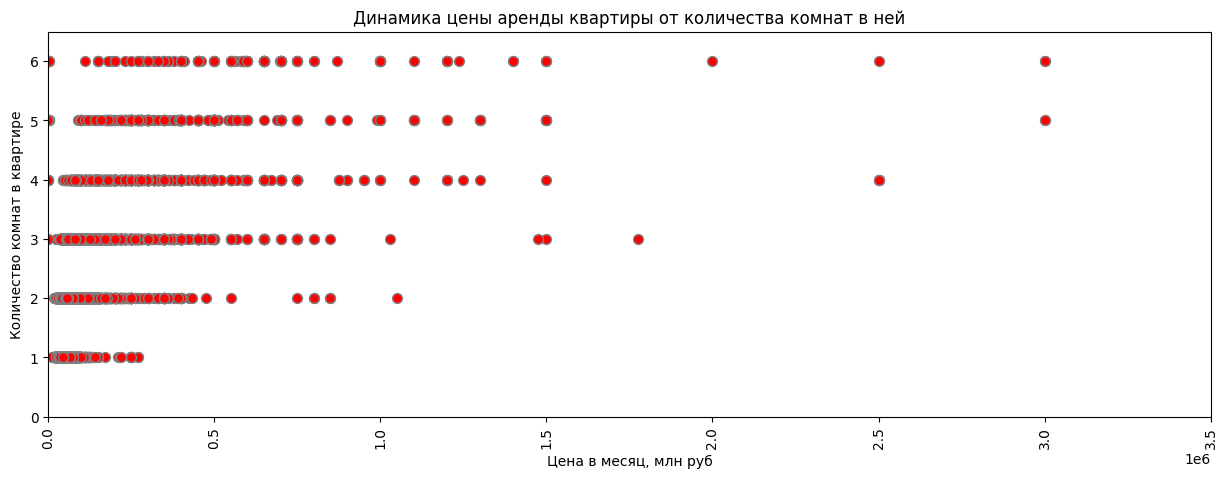

In [91]:
fig = plt.figure(figsize=(15,5))
plt.scatter(df_cleaned['Цена в месяц'], df_new['Количество комнат'], c ="red", 
            linewidths = 1, 
            marker ="o", 
            edgecolor ="grey", 
            s = 50)
plt.xticks(rotation = 90)
plt.ylim(0, 6.5)
plt.xlim(0, 3500000)
plt.ylabel('Количество комнат в квартире')
plt.xlabel('Цена в месяц, млн руб')
plt.title("Динамика цены аренды квартиры от количества комнат в ней");


## Построим тепловую карту для **Цены квартиры в месяц** и **Количество комнат в квартире**

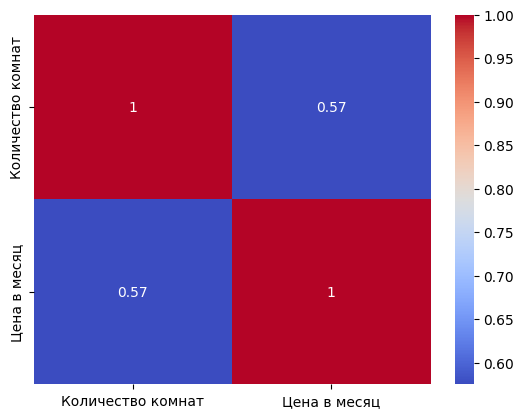

In [200]:
df_corr = df_new[['Количество комнат', 'Цена в месяц']]
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm');